In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def seird_equations(y, beta, sigma, gamma, delta):
    S, E, I, R, D = y
    N = S + E + I + R + D  # Total population (should be conserved)
    N = 1
    dS_dt = -beta * S * I / N            # Susceptible dynamics
    dE_dt = beta * S * I / N - sigma * E # Exposed dynamics
    dI_dt = sigma * E - (gamma + delta) * I # Infectious dynamics
    dR_dt = gamma * I                    # Recovered dynamics
    dD_dt = delta * I                    # Death dynamics
    
    return [dS_dt, dE_dt, dI_dt, dR_dt, dD_dt]

# Euler method implementation for SEIRD model
def eulermethod_seird(seird_equations, initial_conditions, t, params):
    x = initial_conditions
    xs = [x]
    for idx in range(t.shape[0]-1):
        dt = t[idx+1] - t[idx]
        force = seird_equations(x, *params)
        x = [s + dt * f for s, f in zip(x, force)]
        xs.append(x)
    xs = np.array(xs)
    return xs[:,0], xs[:,1], xs[:,2], xs[:,3], xs[:,4]

# Function to generate SEIRD data
def generate_seird_data(t, num_simulations):
    # Mean parameters
    beta_mean, sigma_mean, gamma_mean, delta_mean = 0.9, 0.5, 0.2, 0.05 
    
    data = np.empty((num_simulations, t.shape[0], 5))  # 5 compartments: S, E, I, R, D
    initial_conditions_list = []

    # Generate synthetic datasets
    for i in range(num_simulations):
        beta, sigma, gamma, delta = beta_mean, sigma_mean, gamma_mean, delta_mean
        
        # Generate a random initial condition that sums to 1
        random_array = np.random.rand(5)  # Generate for S, E, I, R, D
        normalized_array = random_array / np.sum(random_array)  # Normalize to make sure they sum to 1
        
        initial_condition = [value.item() for value in normalized_array]
        initial_conditions_list.append(initial_condition)
        
        # Solve SEIRD model using Euler's method
        S, E, I, R, D = eulermethod_seird(seird_equations, initial_condition, t, params=(beta, sigma, gamma, delta))
        
        data[i,:,0] = S
        data[i,:,1] = E
        data[i,:,2] = I
        data[i,:,3] = R
        data[i,:,4] = D

    return data, initial_conditions_list

# Split data into training and testing datasets
def split_data(data, initial_conditions, split_ratio=0.5):
    num_simulations = data.shape[0]
    num_train = int(split_ratio * num_simulations)
    
    # Shuffle indices to split
    indices = np.arange(num_simulations)
    np.random.shuffle(indices)
    
    # Split indices into training and testing
    train_indices = indices[:num_train]
    test_indices = indices[num_train:]
    
    # Create training and testing datasets
    train_data = data[train_indices]
    test_data = data[test_indices]
    
    # Initial conditions for training and testing
    train_initial_conditions = [initial_conditions[i] for i in train_indices]
    test_initial_conditions = [initial_conditions[i] for i in test_indices]
    
    return train_data, test_data, train_initial_conditions, test_initial_conditions

# Generate the data
num_simulations = 200  # Total number of simulations
t = np.arange(0, 50, 0.2)  # Time grid

# Generate SEIRD data and initial conditions
data, initial_conditions = generate_seird_data(t, num_simulations)

# Split the data into training and testing
train_data, test_data, train_initial_conditions, test_initial_conditions = split_data(data, initial_conditions)

# Save the training data and testing data
np.savez('seird_training_data.npz', data=train_data)
np.savez('seird_testing_data.npz', data=test_data)

# Save the initial conditions for both datasets
pd.DataFrame(train_initial_conditions, columns=["S0", "E0", "I0", "R0", "D0"]).to_csv('seird_train_initial_conditions.csv', index=False)
pd.DataFrame(test_initial_conditions, columns=["S0", "E0", "I0", "R0", "D0"]).to_csv('seird_test_initial_conditions.csv', index=False)

print("Training and testing datasets have been generated and saved!")


Training and testing datasets have been generated and saved!


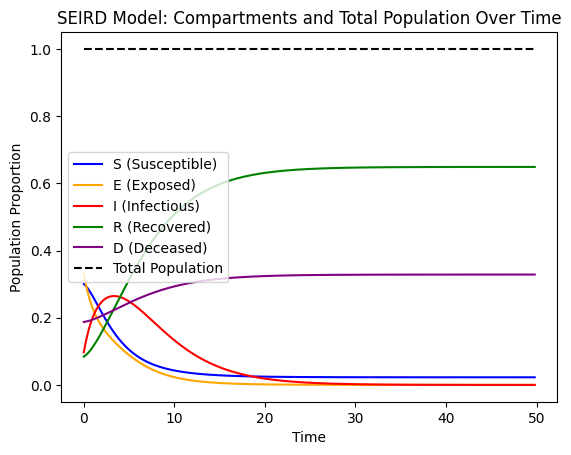

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the saved training or testing data (example: loading training data)
data = np.load('seird_training_data.npz')['data']  # You can load 'seird_testing_data.npz' similarly

# Time grid (ensure this matches the one used during data generation)
t = np.arange(0, 50, 0.2)

# Select the simulation you want to plot (e.g., the first simulation, index 0)
simulation_index = 43
S = data[simulation_index, :, 0]  # Susceptible
E = data[simulation_index, :, 1]  # Exposed
I = data[simulation_index, :, 2]  # Infectious
R = data[simulation_index, :, 3]  # Recovered
D = data[simulation_index, :, 4]  # Deceased

# Calculate the total population at each time step
total_population = S + E + I + R + D

# Plot each compartment
plt.plot(t, S, label='S (Susceptible)', color='blue')
plt.plot(t, E, label='E (Exposed)', color='orange')
plt.plot(t, I, label='I (Infectious)', color='red')
plt.plot(t, R, label='R (Recovered)', color='green')
plt.plot(t, D, label='D (Deceased)', color='purple')

# Plot the total population (should be constant if N=1)
plt.plot(t, total_population, label='Total Population', color='black', linestyle='--')

# Labels and title
plt.xlabel('Time')
plt.ylabel('Population Proportion')
plt.title('SEIRD Model: Compartments and Total Population Over Time')
plt.legend(loc='best')

# Show the plot
plt.show()

